In [4]:
import pandas as pd

**1. import the dataset**

In [8]:
inp0 = pd.read_csv("hour.csv") #import the dataset
inp0.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**2. checking null values, drop records with NAs**

In [9]:
inp0.isna().sum(axis=0) #checking null values

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
import numpy as np

**3. sanity check for count**

In [16]:
np.sum((inp0.casual + inp0.registered) != inp0.cnt) #registered + casual = cnt for all the records 
#sanity check for count

0

In [14]:
np.unique(inp0.mnth) #sanity check for months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [15]:
np.unique(inp0.hr) #sanity check for hours

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

**4. Variables ‘casual’, ‘registered’ are redundant and need to be dropped. ‘Instant’ is the index, and needs to be dropped too. The date column dteday will not be used in the model building, and hence needs to be dropped. Create new dataframe named ‘inp1’.**

In [19]:
cols_to_drop = ['casual', 'registered', 'dteday', 'instant']

In [20]:
inp1 = inp0.drop(cols_to_drop, axis=1).copy()

**5. Univariate analysis**

In [23]:
inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


<AxesSubplot:ylabel='Density'>

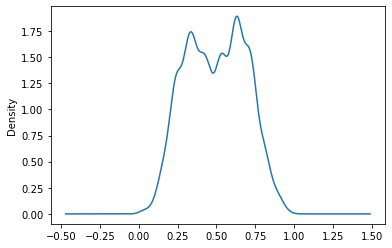

In [27]:
inp1.temp.plot.density() #density plot

In [25]:
import seaborn as sns

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='atemp'>

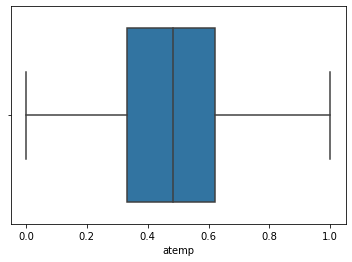

In [28]:
sns.boxplot(inp1.atemp) #boxplot to detect outliers

<AxesSubplot:ylabel='Frequency'>

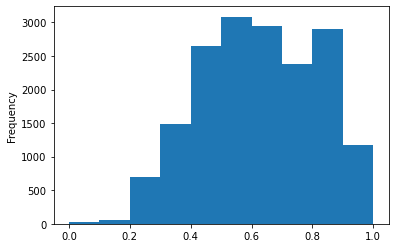

In [29]:
inp1.hum.plot.hist() #Histogram for detecting any abnormally high values

<AxesSubplot:ylabel='Density'>

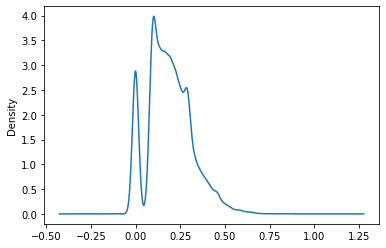

In [30]:
inp1.windspeed.plot.density()

<AxesSubplot:ylabel='Density'>

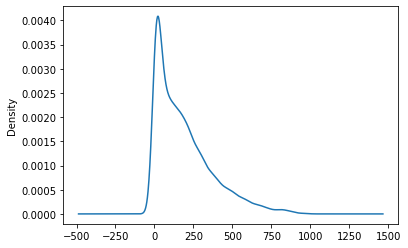

In [31]:
inp1.cnt.plot.density()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

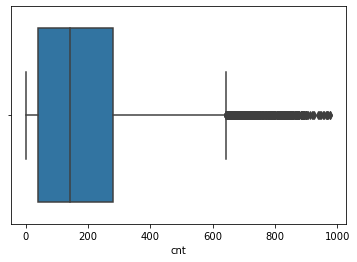

In [32]:
sns.boxplot(inp1.cnt)

**6. Outlier Treatment**

In [43]:
inp1.cnt.quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.10      9.00
0.25     40.00
0.50    142.00
0.75    281.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

In [34]:
inp2 = inp1[inp1.cnt < 563].copy()

**7. Bi-Variate analysis**

In [47]:
from matplotlib import pyplot as plt

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hr', ylabel='cnt'>

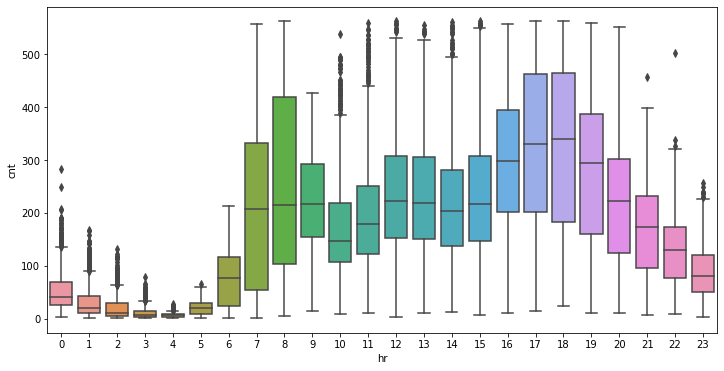

In [56]:
plt.figure(figsize=[12,6])
sns.boxplot("hr", "cnt", data=inp2)
#cnt vs hr

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='cnt'>

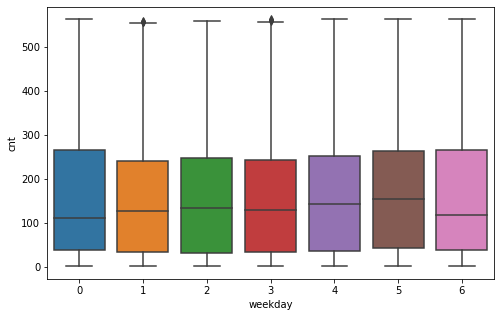

In [57]:
plt.figure(figsize=[8,5])
sns.boxplot("weekday", "cnt", data=inp2)
#cnt vs weekday

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

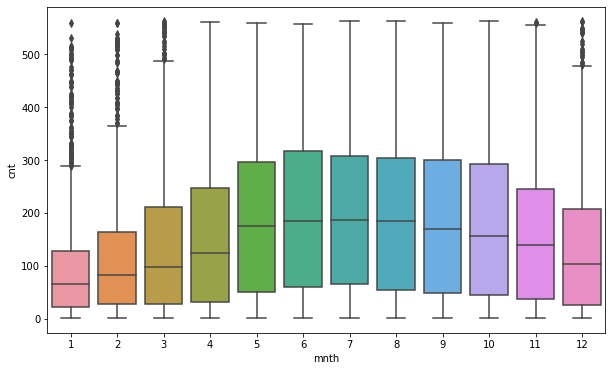

In [58]:
plt.figure(figsize=[10,6])
sns.boxplot("mnth", "cnt", data=inp2)
#cnt vs month

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='cnt'>

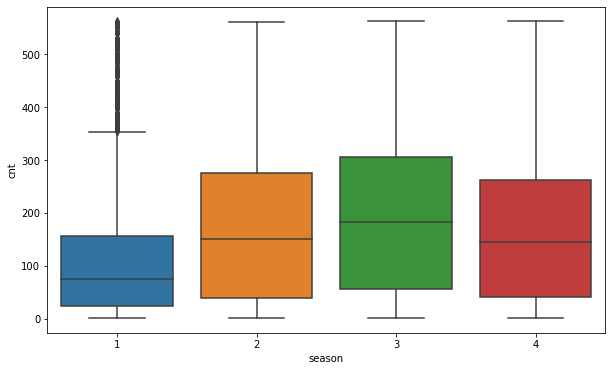

In [59]:
plt.figure(figsize=[10,6])
sns.boxplot("season", "cnt", data=inp2)
#cnt vs season

<BarContainer object of 24 artists>

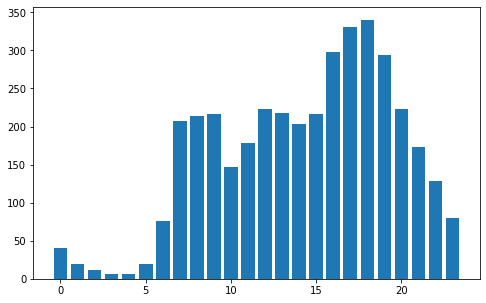

In [79]:
hour_cnt_median = inp2.groupby("hr")["cnt"].agg("median")
plt.figure(figsize=[8,5])
plt.bar(inp2["hr"].unique(),hour_cnt_median)

#bar plot with the median value of cnt for each hr

**Correlation**

In [74]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
corrs = inp2[num_vars].corr()
corrs

,temp,atemp,hum,windspeed
temp,1.000000,0.988218,-0.042603,-0.033209
atemp,0.988218,1.000000,-0.025747,-0.073985
hum,-0.042603,-0.025747,1.000000,-0.288648
windspeed,-0.033209,-0.073985,-0.288648,1.000000


In [75]:
#heatmap

<AxesSubplot:>

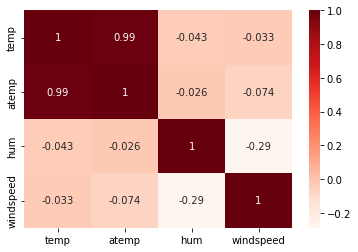

In [76]:
sns.heatmap(corrs, annot=True, cmap="Reds")

**8. Data pre-processing**

In [81]:
import warnings
warnings.filterwarnings("ignore")
inp3 = inp2.copy()
inp3.mnth[inp3.mnth.isin([5,6,7,8,9])] = 5
np.unique(inp3.mnth)

#Treating 'mnth' column

array([ 1,  2,  3,  4,  5, 10, 11, 12], dtype=int64)

In [83]:
#Treating 'hr' column
inp3.hr[inp3.hr.isin([0,1,2,3,4,5])] = 0
inp3.hr[inp3.hr.isin([11,12,13,14,15])] = 11
np.unique(inp3.hr)


array([ 0,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype=int64)

**Get dummy columns for season, weathersit, weekday, mnth, hr. We needn’t club these further, because as seen from the box plots, the levels seem to have different values for the median cnt.** 

In [84]:
cat_cols = ['season', 'weathersit', 'weekday', 'mnth', 'hr']
inp3 = pd.get_dummies(inp3, columns=cat_cols, drop_first=True)
inp3.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_6', 'hr_7', 'hr_8',
       'hr_9', 'hr_10', 'hr_11', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

**9. Train test split – apply 70-30 split**
- call the new dataframes df_train, df_test


In [85]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp3, train_size = 0.7, random_state = 100)


**10. Separate X and Y for df_train and df_test.**

In [86]:
y_train = df_train.pop("cnt")
X_train = df_train

y_test = df_test.pop("cnt")
X_test = df_test


**10 . Model building**
-	Use Linear regression as the technique
-	Report the R2 on the train set


In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [88]:
from sklearn.metrics import r2_score
y_train_pred= lr.predict(X_train)
r2_score(y_train, y_train_pred)
#Reporting r2 for the model

0.6702524831277605

**11. Make predictions on test set, report R2**

In [89]:
y_test_pred= lr.predict(X_test)
r2_score(y_test, y_test_pred)


0.6645500127041257